In [1]:
import pandas as pd
import numpy as np
from sklearn import tree, utils, model_selection,metrics

In [2]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data')

In [3]:
df.columns = ['class_name', 'left_weight', 'left_dist', 'right_weight', 'right_dist']
df.head()

,class_name,left_weight,left_dist,right_weight,right_dist
0,R,1,1,1,2
1,R,1,1,1,3
2,R,1,1,1,4
3,R,1,1,1,5
4,R,1,1,2,1


In [5]:
df['class_name'].value_counts()

L    288
R    288
B     48
Name: class_name, dtype: int64

In [7]:
y = df['class_name']
X = df.drop('class_name', axis=1)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.5, random_state=0)

In [8]:
decision_tree = tree.DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
decision_tree.score(X_test, y_test)

0.74679487179487181

In [10]:
y_pred = decision_tree.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred, labels=['B', 'L', 'R'])
cm

array([[  3,   9,  11],
       [ 25, 122,   9],
       [ 19,   6, 108]], dtype=int64)

In [11]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[  3   9  11]
 [ 25 122   9]
 [ 19   6 108]]


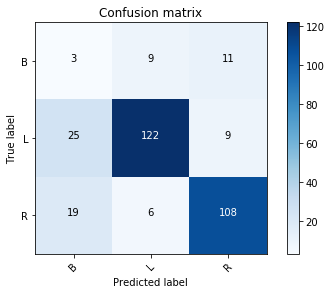

In [12]:
plot_confusion_matrix(cm, ['B', 'L', 'R'])
plt.show()

In [15]:
false_positive = cm.sum(axis=0) - np.diag(cm)
false_negative = cm.sum(axis=1) - np.diag(cm)
true_positive = np.diag(cm)
true_negative = cm.sum() - (false_positive + false_negative + true_positive)

In [16]:
recall = true_positive / (true_positive + false_negative)
recall

array([ 0.13043478,  0.78205128,  0.81203008])

In [17]:
specificity = true_negative / (true_negative + false_positive)
specificity

array([ 0.84775087,  0.90384615,  0.88826816])

In [19]:
precision = true_positive / (true_positive + false_positive)
precision

array([ 0.06382979,  0.89051095,  0.84375   ])